1.Q1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from matplotlib.pyplot import figure
from cvxopt import solvers
import cvxopt


plt.style.use('seaborn')


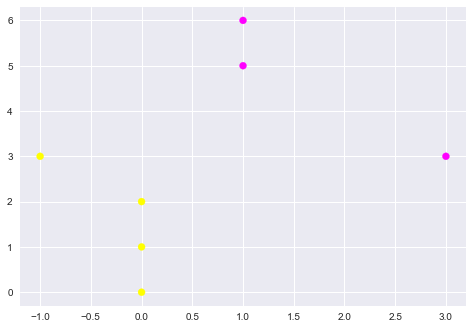

In [2]:
X=np.array([[-1, 3],[0, 2],[0, 1],[0, 0],[1,5],[1,6],[3,3]])
y=np.array([1,1,1,1,0,0,0])
plt.scatter(X[:,0],X[:,1],c=y,marker='o',cmap='spring')

Two ways of plotting the separating plane

(1)

In [3]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

w= [[-0.49984 -0.49984]]
b= [1.99925333]


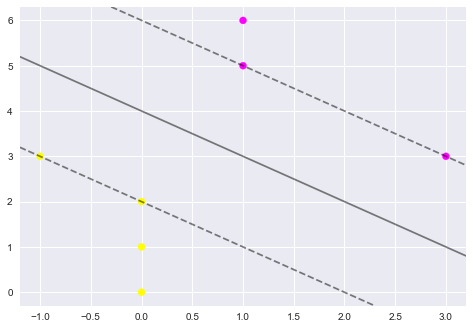

In [4]:
clf=SVC(kernel='linear')
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,marker='o',cmap='spring')
plot_svc_decision_function(clf)
print("w=",clf.coef_)
print("b=",clf.intercept_)

In [5]:
clf.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

(2)

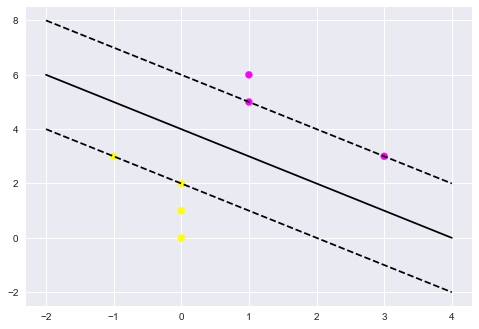

In [6]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 4)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(X[:,0],X[:,1],c=y,marker='o',cmap='spring')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [7]:
X=np.array([[-1, 3],[0, 2],[0, 1],[0,0],[1,5],[1,6],[3,3],[-2,0],[-2,1],[-2, 3],[-1, 0],[-1, 1]])
y=np.array([1,1,1,1,0,0,1,1,1,1,1,1])

w= [[-2.22044605e-16 -9.99624399e-01]]
b= [3.9986854]


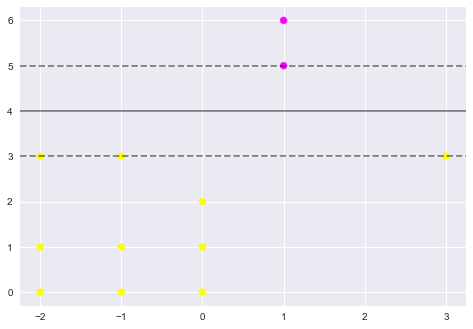

In [8]:
clf=SVC(kernel='linear')
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,marker='o',cmap='spring')
plot_svc_decision_function(clf)
print("w=",clf.coef_)
print("b=",clf.intercept_)

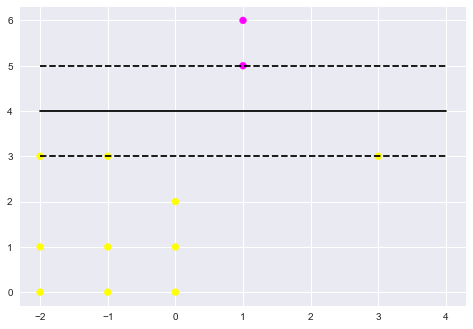

In [9]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 4)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(X[:,0],X[:,1],c=y,marker='o',cmap='spring')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

Q3

In [10]:
#first import the libraries needed and load the dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics as skm
df=pd.read_csv("wdbc.data")

(1)SVM1

In [11]:
X = df[['Radius(Mean)','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave points','Symmetry','Fractal Dimension','Radius(SE)','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave points','Symmetry','Fractal Dimension','Radius(Mean of 3 largest)','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave points','Symmetry','Fractal Dimension']].values
Y= df['Diagnosis'].values
scores_train=np.zeros(20)
scores_test=np.zeros(20)
precision=np.zeros(20)
recall=np.zeros(20)
clf=SVC(kernel='linear')
for i in range(20):
    (X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, test_size=0.7)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    scores_train[i]=clf.score(X_train,Y_train)
    scores_test[i]=clf.score(X_test,Y_test)
    precision[i]=skm.precision_score(Y_test,Y_pred,average='macro')
    recall[i]=skm.recall_score(Y_test,Y_pred,average='macro')
print("Average accuracy for training data\n",scores_train.sum()/20)
print("Average accuracy for test data\n",scores_test.sum()/20)
print("Average precision:",precision.sum()/20)
print("Average recall:",recall.sum()/20)



Average accuracy for training data
 0.9617647058823527
Average accuracy for test data
 0.9458646616541351
Average precision: 0.9449762509133806
Average recall: 0.9390571777673795


(2)SVM2

In [12]:
clf=SVC(kernel='rbf')
for i in range(20):
    (X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, test_size=0.7)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    scores_train[i]=clf.score(X_train,Y_train)
    scores_test[i]=clf.score(X_test,Y_test)
    precision[i]=skm.precision_score(Y_test,Y_pred,average='macro')
    recall[i]=skm.recall_score(Y_test,Y_pred,average='macro')
print("Average accuracy for training data\n",scores_train.sum()/20)
print("Average accuracy for test data\n",scores_test.sum()/20)
print("Average precision:",precision.sum()/20)
print("Average recall:",recall.sum()/20)

Average accuracy for training data
 0.8758823529411766
Average accuracy for test data
 0.8723057644110275
Average precision: 0.8949460544301567
Average recall: 0.83770029742763


(3)SVM3

In [13]:
def find_bestC(X_train,Y_train):
    (X_train,X_test,y_train,y_test)=train_test_split(X_train, Y_train, test_size=0.7)
    folds = 5
    cs = [1,2,3,4,5,6,7,8,9,10]
    Cs = []
    for c in cs:
        Cs.append(np.power(10.,c))
    # Cs = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]

    accuracy_of_C = {}  #字典类型

    for C in Cs:
        accuracy_of_C[C] = []
        clf = SVC(C=C)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        correct = np.sum(y_pred == y_test)
        accuracy = float(correct)/len(y_test)
        accuracy_of_C[C].append(accuracy)
    accuracys = []
    for C in Cs:
        avgacc = 0.0
        for accuracy in accuracy_of_C[C]:
            avgacc += accuracy
        temp = avgacc/len(accuracy_of_C[C])
        accuracys.append(temp)
    ##求np数组的最大值的下标 np.arg(xx)  求列表最大值的下标xx.index(max(xx))
    bestC_index = accuracys.index(max(accuracys))
    bestC = Cs[bestC_index]

    return bestC
    # print(accuracys)

[100000.0, 1000.0, 1000000.0, 1000000.0, 100000.0, 100000.0, 1000000.0, 100000.0, 100000.0, 10000.0, 10000.0, 100000.0, 1000000.0, 10000.0, 100000.0, 100.0, 100000.0, 100.0, 100000.0, 1000000.0]
Average accuracy for training data 0.9517647058823527
Average accuracy for test data 0.930451127819549
Average precision: 0.9330736599239075
Average recall: 0.9182234258794345


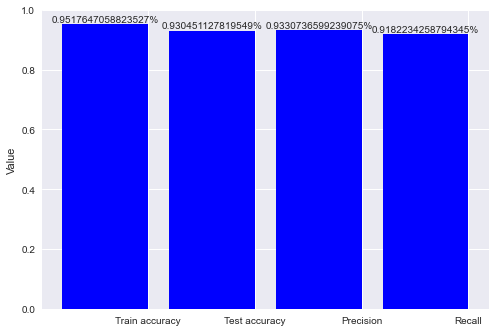

In [14]:
clf=SVC(kernel='rbf')
bestCs=[]
for i in range(20):
    (X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, test_size=0.7)
    bestC=find_bestC(X_train,Y_train)
    bestCs.append(bestC)
    clf.set_params(C=bestC)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    scores_train[i]=clf.score(X_train,Y_train)
    scores_test[i]=clf.score(X_test,Y_test)
    precision[i]=skm.precision_score(Y_test,Y_pred,average='macro')
    recall[i]=skm.recall_score(Y_test,Y_pred,average='macro')
#plt.plot(bestCs,scores_test)

#plt.show()
#plt.close()

print(bestCs)
print("Average accuracy for training data",scores_train.sum()/20)
print("Average accuracy for test data",scores_test.sum()/20)
print("Average precision:",precision.sum()/20)
print("Average recall:",recall.sum()/20)
name_list = ['Train accuracy', 'Test accuracy', 'Precision', 'Recall']
num_list = [scores_train.sum()/20, scores_test.sum()/20, precision.sum()/20, recall.sum()/20]
rects=plt.bar(range(len(num_list)), num_list, color='b')
# X轴标题
index=[0,1,2,3]
index=[float(c)+0.4 for c in index]
plt.ylim(ymax=1, ymin=0)
plt.xticks(index, name_list)
plt.ylabel("Value") #X轴标签
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height)+'%', ha='center', va='bottom')
plt.show()